In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-stock-prices/goldstock.csv


In [64]:
df=pd.read_csv('/kaggle/input/gold-stock-prices/goldstock.csv')

In [65]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [66]:
df = df.drop(columns = 'Unnamed: 0')

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

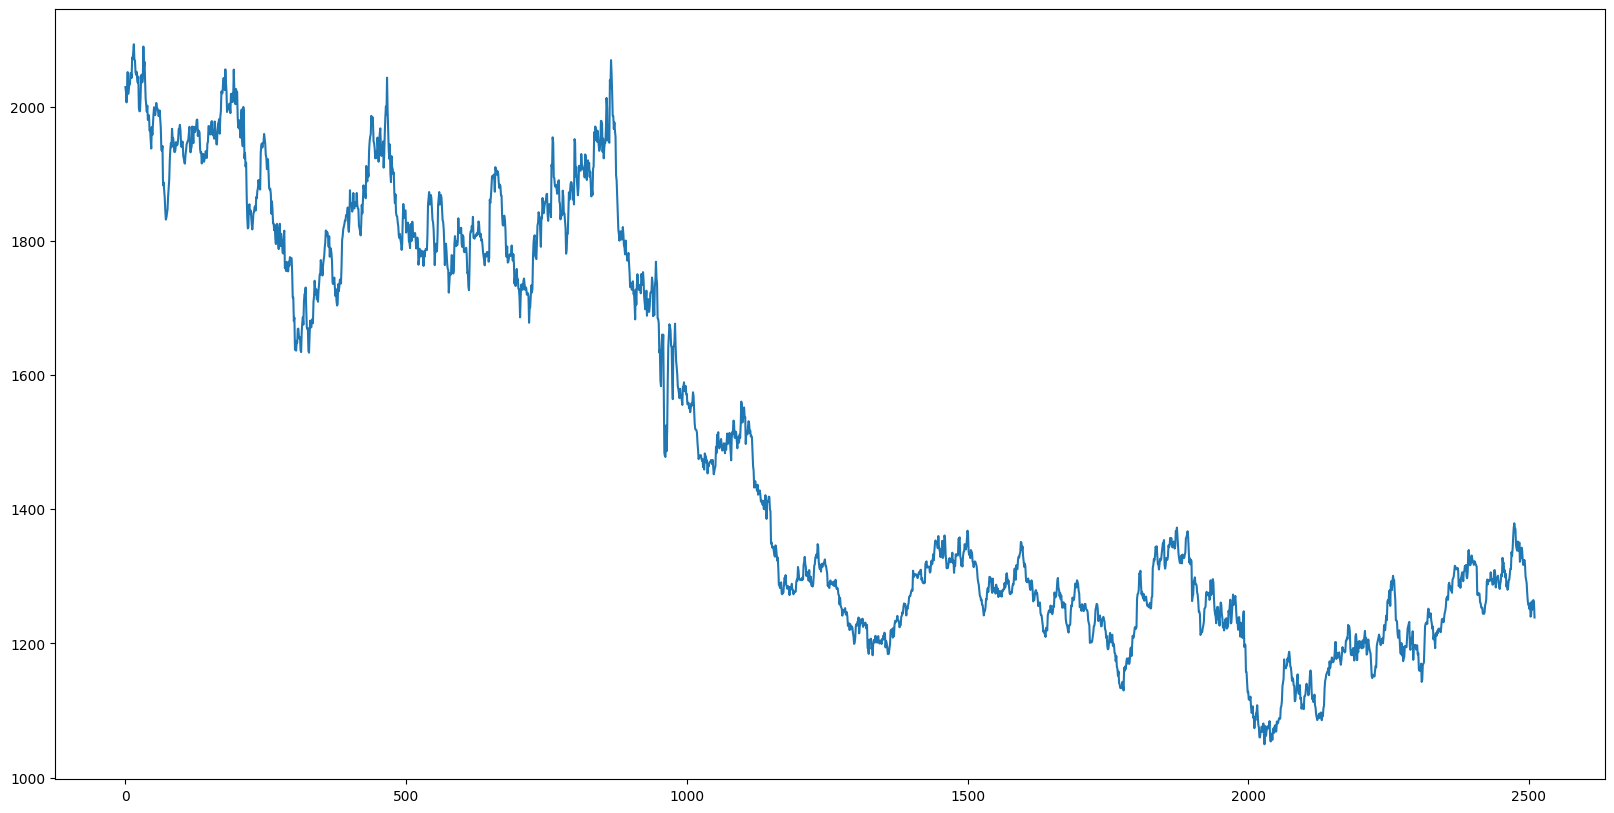

In [68]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'], label = 'Closing Price')
plt.show()

In [69]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df.head()

,Date,Close,Volume,Open,High,Low,Open - Close,High - Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,-1.9,19.7
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,-12.5,17.9
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,25.2,31.5
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,23.2,35.2
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,-18.4,34.2


In [70]:
X = df[['Open - Close', 'High - Low']]
X

,Open - Close,High - Low
0,-1.9,19.7
1,-12.5,17.9
2,25.2,31.5
3,23.2,35.2
4,-18.4,34.2
...,...,...
2506,4.4,13.9
2507,6.4,28.1
2508,-0.2,16.3
2509,-27.4,36.3


# Classification Problem : 
## Whether to buy(+1) or sell(-1) a stock

In [71]:
Y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)
Y

array([-1, -1,  1, ..., -1, -1, -1])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [74]:
models={
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Ridge": RidgeClassifier()
}
model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    model_list.append(list(models.keys())[i])
    print(list(models.keys())[i])
    #Model Evaluation :
    train_accuracy = accuracy_score(y_train, y_train_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    print('Training set accuracy: %.2f' %train_accuracy)
    print('Test set accuracy: %.2f' %test_accuracy)
    accuracy_list.append(test_accuracy)
    print('='*35)

K Nearest Neighbor
Training set accuracy: 0.90
Test set accuracy: 0.85
Ada Boost
Training set accuracy: 0.88
Test set accuracy: 0.86
Random Forest
Training set accuracy: 1.00
Test set accuracy: 0.84
Decision Tree
Training set accuracy: 1.00
Test set accuracy: 0.80
Ridge
Training set accuracy: 0.88
Test set accuracy: 0.87


In [75]:
pd.DataFrame({'Model': model_list, 'Accuracy Score': accuracy_list}).sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
4,Ridge,0.867834
1,Ada Boost,0.859873
0,K Nearest Neighbor,0.847134
2,Random Forest,0.839172
3,Decision Tree,0.797771


In [76]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy score is :',accuracy)

Accuracy score is : 85.98726114649682


In [77]:
pd.DataFrame({'Actual Value': y_test, 'Predicted Value' : y_pred, 'Difference': y_test - y_pred}).head(10)

,Actual Value,Predicted Value,Difference
0,-1,-1,0
1,-1,-1,0
2,-1,-1,0
3,-1,-1,0
4,-1,1,-2
5,1,1,0
6,-1,-1,0
7,-1,-1,0
8,1,-1,2
9,1,1,0


# Regression problem :
## Predicting the 'Close' price

In [78]:
df.head()

,Date,Close,Volume,Open,High,Low,Open - Close,High - Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,-1.9,19.7
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,-12.5,17.9
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,25.2,31.5
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,23.2,35.2
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,-18.4,34.2


In [79]:
X_reg = df.drop(columns=['Close','Date'])
X_reg

,Volume,Open,High,Low,Open - Close,High - Low
0,166078.0,2027.4,2041.9,2022.2,-1.9,19.7
1,167013.0,2009.1,2025.6,2007.7,-12.5,17.9
2,245194.0,2031.7,2036.1,2004.6,25.2,31.5
3,277995.0,2053.4,2062.8,2027.6,23.2,35.2
4,250946.0,2033.2,2067.3,2033.1,-18.4,34.2
...,...,...,...,...,...,...
2506,81426.0,1254.9,1261.9,1248.0,4.4,13.9
2507,63419.0,1269.9,1280.1,1252.0,6.4,28.1
2508,34998.0,1264.3,1273.2,1256.9,-0.2,16.3
2509,41697.0,1235.1,1267.1,1230.8,-27.4,36.3


In [80]:
Y_reg = df['Close']
Y_reg

0       2029.3
1       2021.6
2       2006.5
3       2030.2
4       2051.6
         ...  
2506    1250.5
2507    1263.5
2508    1264.5
2509    1262.5
2510    1238.6
Name: Close, Length: 2511, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,Y_reg,test_size = 0.25, random_state = 42)

In [82]:
X_train_reg.shape

(1883, 6)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [84]:
def EvaluateModel(true, predicted):
    mae = mean_absolute_error(true, predicted),
    rmse = np.sqrt(mean_squared_error(true, predicted)),
    r2_sc = r2_score(true, predicted)
    return mae, rmse, r2_sc

models_reg = {
    "K Nearest Neighbor": KNeighborsRegressor(),
    "Ada Boost": AdaBoostRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Lasso" : Lasso(),
    "Linear Regression" : LinearRegression()
}
model_reg_list = []
mae_list = []
rmse_list = []
r2_list = []

for i in range(len(list(models_reg))):
    model_reg = list(models_reg.values())[i]
    model_reg.fit(X_train_reg, y_train_reg)
    
    y_train_predict_reg = model_reg.predict(X_train_reg)
    y_test_predict_reg = model_reg.predict(X_test_reg)
    
    model_reg_list.append(list(models_reg.keys())[i])
    print(list(models_reg.keys())[i])
    #Model Evaluation :
    train_mae, train_rmse, train_r2 = EvaluateModel(y_train_reg, y_train_predict_reg)
    test_mae, test_rmse, test_r2 = EvaluateModel(y_test_reg, y_test_predict_reg)
    print('Training set mean absolute error: %.2f' %train_mae)
    print('Training set root mean squared error: %.2f' %train_rmse)
    print('Training set r2 score: %.2f' %train_r2)
    print('-'*35)
    print('Test set mean absolute error: %.2f' %test_mae)
    print('Test set root mean squared error: %.2f' %test_rmse)
    print('Test set r2 score: %.2f' %test_r2)
    mae_list.append(test_mae)
    rmse_list.append(test_rmse)
    r2_list.append(test_r2)
    
    print('='*35)
    print('\n')

K Nearest Neighbor
Training set mean absolute error: 76.92
Training set root mean squared error: 116.44
Training set r2 score: 0.85
-----------------------------------
Test set mean absolute error: 111.66
Test set root mean squared error: 160.80
Test set r2 score: 0.71


Ada Boost
Training set mean absolute error: 9.99
Training set root mean squared error: 12.40
Training set r2 score: 1.00
-----------------------------------
Test set mean absolute error: 11.29
Test set root mean squared error: 14.47
Test set r2 score: 1.00


Random Forest
Training set mean absolute error: 1.33
Training set root mean squared error: 2.05
Training set r2 score: 1.00
-----------------------------------
Test set mean absolute error: 3.78
Test set root mean squared error: 6.18
Test set r2 score: 1.00


Decision Tree
Training set mean absolute error: 0.00
Training set root mean squared error: 0.00
Training set r2 score: 1.00
-----------------------------------
Test set mean absolute error: 5.05
Test set root 

In [85]:
pd.DataFrame({'Model': model_reg_list, 'MAE Score': mae_list, 'RMSE Score': rmse_list, 'R2 Score': r2_list}).sort_values(by='R2 Score', ascending=False)

,Model,MAE Score,RMSE Score,R2 Score
6,Linear Regression,"(1.8935737620511205e-13,)","(2.4598239732071807e-13,)",1.000000
4,Ridge,"(0.00017359008601724375,)","(0.0002478523803199276,)",1.000000
5,Lasso,"(0.055864036813945035,)","(0.08104755901105104,)",1.000000
2,Random Forest,"(3.7833375796177746,)","(6.179219756261939,)",0.999572
3,Decision Tree,"(5.0512738853503265,)","(8.288943983203646,)",0.999229
1,Ada Boost,"(11.294884611878542,)","(14.47142838170658,)",0.997650
0,K Nearest Neighbor,"(111.66366242038217,)","(160.7986587606864,)",0.709869


In [88]:
model_testing_reg = LinearRegression()
model_testing_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = model_testing_reg.predict(X_test_reg)
r2sc = r2_score(y_test_reg, y_pred_reg)*100
print('R2 score is :',r2sc)

R2 score is : 100.0


In [89]:
pd.DataFrame({'Actual Value': y_test_reg, 'Predicted Value' : y_pred_reg, 'Difference': y_test_reg - y_pred_reg}).head(10)

,Actual Value,Predicted Value,Difference
443,1945.6,1945.6,0.000000e+00
2417,1253.3,1253.3,4.547474e-13
2404,1321.3,1321.3,0.000000e+00
1575,1274.9,1274.9,0.000000e+00
700,1728.8,1728.8,2.273737e-13
693,1736.3,1736.3,2.273737e-13
601,1808.5,1808.5,0.000000e+00
874,1897.5,1897.5,-2.273737e-13
748,1859.0,1859.0,0.000000e+00
1652,1246.7,1246.7,2.273737e-13
